In [1]:
import os
from nilearn import plotting
import nibabel as nib

import sys

# Append the path to access custom modules
if '../' not in sys.path:
    sys.path.append('../')


import matplotlib.pyplot as plt

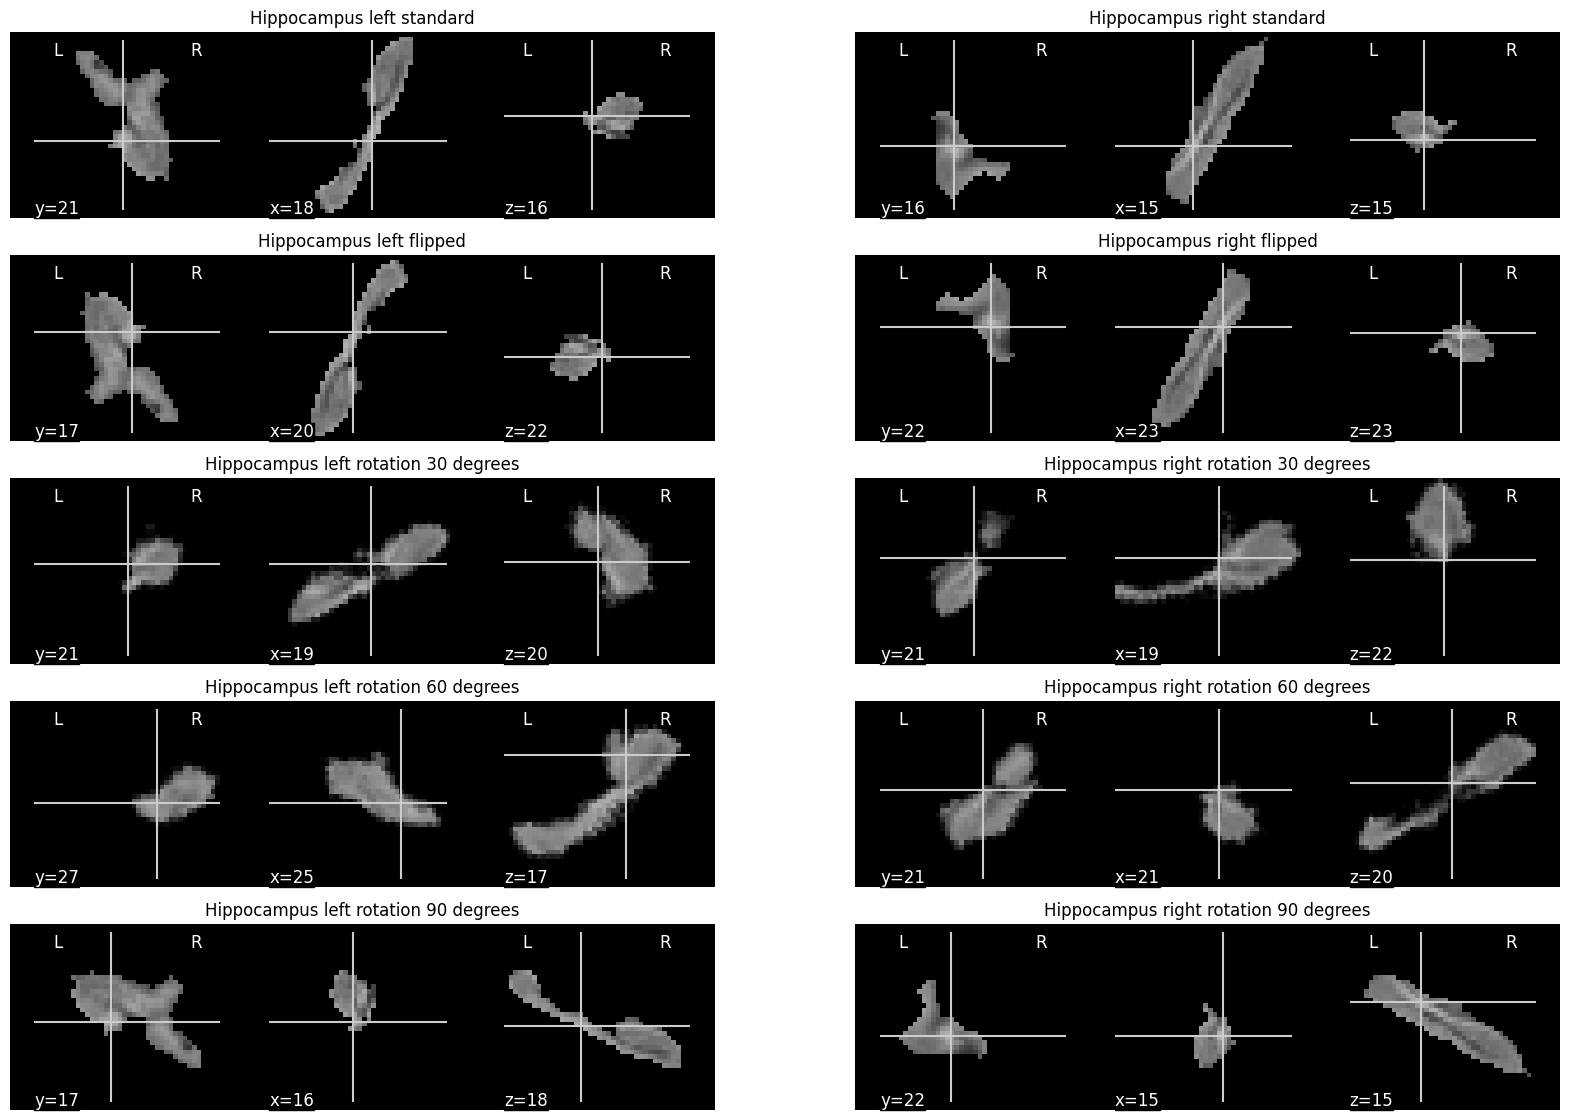

In [44]:
fig, axes = plt.subplots(5, 2, figsize=(20, 14));

standard = os.path.join('..', 'data', 'upload', 'train_preprocess', 'OAS30098_MR_d0036')
rot30 = os.path.join('..', 'data', 'upload', 'train_preprocess', 'OAS30098_MR_d0036_rot30')
rot60 = os.path.join('..', 'data', 'upload', 'train_preprocess', 'OAS30098_MR_d0036_rot60')
rot90 = os.path.join('..', 'data', 'upload', 'train_preprocess', 'OAS30098_MR_d0036_rot90')
flip = os.path.join('..', 'data', 'upload', 'train_preprocess', 'OAS30098_MR_d0036_flip')

axes = axes.flatten()

pics = [standard, flip, rot30, rot60, rot90]
index = [0, 2, 4, 6, 8]
titles = ['standard', 'flipped', 'rotation 30 degrees', 'rotation 60 degrees', 'rotation 90 degrees']


for path, i, title in zip(pics, index, titles):
    plotting.plot_anat(nib.load(os.path.join(path, 'hippocampus_left_processed.nii.gz')), axes=axes[i])
    plotting.plot_anat(nib.load(os.path.join(path, 'hippocampus_right_processed.nii.gz')), axes=axes[i + 1])

    axes[i].set_title(f'Hippocampus left {title}')
    axes[i + 1].set_title(f'Hippocampus right {title}')

In [ ]:
m1 = os.path.join('..', 'data', 'train', 'OAS31268_MR_d0132', 'mri', 'hippocampus_right.nii.gz')
m2 = os.path.join('..', 'data', 'train', 'OAS31268_MR_d0132', 'mri', 'hippocampus_left.nii.gz')
img1 = nib.load(m1).get_fdata()[0, :, :, :]
img2 = nib.load(m2).get_fdata()[0, :, :, :]

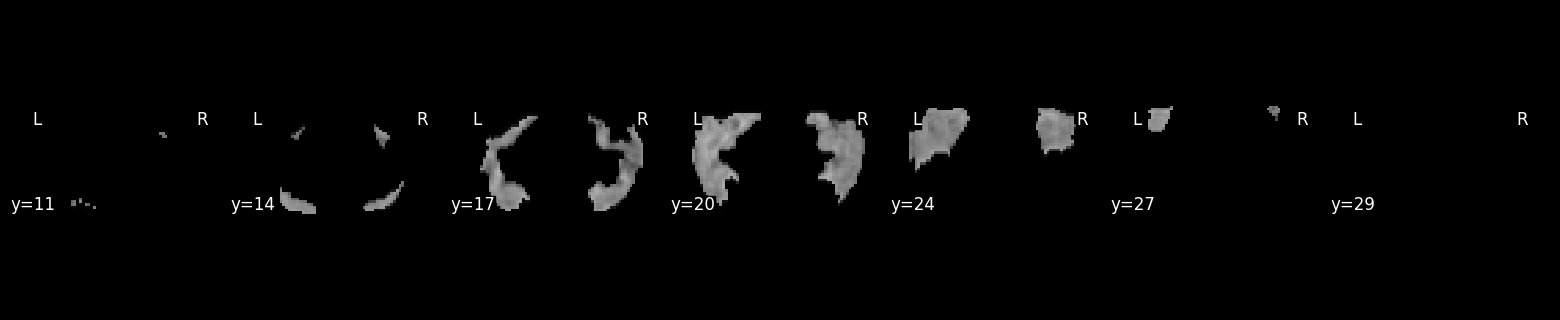

In [52]:
import numpy as np
plotting.plot_anat(nib.Nifti1Image(np.concatenate([img1, img2]), np.eye(4)), cmap='gray', display_mode='y')

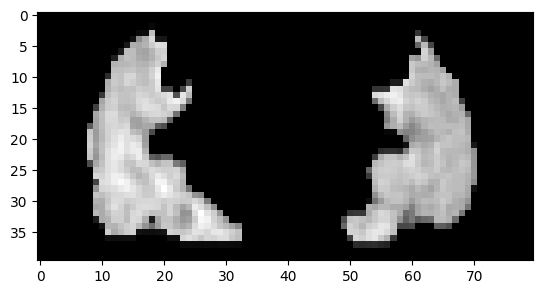

In [57]:
plt.imshow(np.concatenate([img1, img2])[:, 20, :].T, cmap='gray')

In [10]:
from monai.networks.nets import DenseNet121, Densenet169, DenseNet201, DenseNet264

In [14]:
model = DenseNet264(spatial_dims=3, in_channels=1, out_channels=2)

In [15]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [16]:
count_parameters(model)

40251266

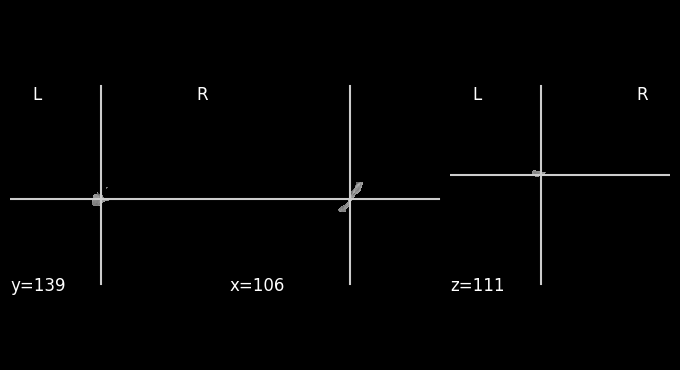

In [3]:
plotting.plot_anat(nib.load('../data/OAS30004_MR_d1101/mri/hippocampus_right.nii.gz'))